In [34]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [35]:
ctx = straxbra.XebraContext()

In [36]:
run = '00201'
peaks_data = ctx.get_array(run, 'peaks')

In [37]:
waveform = peaks_data['data']
integral = peaks_data['area']
width = peaks_data['width'][:,5]
timestamp = peaks_data['time']
area_per_channel = peaks_data['area_per_channel']
risetime = -peaks_data['area_decile_from_midpoint'][:,1]

In [38]:
def PrintWaveform(waveform,i):

    fig, (ax1) = plt.subplots(1, 1, sharex=False, figsize=(12, 3.5))

    ax1.plot(waveform[i])

    plt.show()


In [39]:
def CutCondition(waveform, i):
    
    
    FirstPeak_area = sum(waveform[i][:15]) # range in samples (not ns!)
    Risetime_first_peak = np.argmax(waveform[i][:15])*10
    SecondPeak_area = sum(waveform[i][15:]) # range in samples (not ns!)
    Risetime_second_peak = np.argmax(waveform[i][15:])*10
    
    if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
#        print (i , secondS1_area, secondS1_peaktime)
        return(True, Risetime_first_peak, Risetime_second_peak)
    else:
        return(False, 0, 0)
    

In [40]:
def Sum(area_per_channel, i):
    
    
#     new_list=[]
#     for i in range(0,len(PMT6_light)):
#     if PMT6_light[i] > 0.5:
#         new_list.append(PMT6_light)
    
    
    PMT_sum = 0.5*sum(area_per_channel[i][1:8])
    
    return PMT_sum

In [41]:
def Process(waveform, i):

    CutFlag, Risetime_first_peak, Risetime_second_peak = CutCondition(waveform, i)
    if CutFlag == True:
        Kr_S1_area.append(integral[i])
        Kr_S1_width.append(width[i])

        
        Delta_t.append(Risetime_second_peak - Risetime_first_peak)
        if PrintingFlag == True:
            PrintWaveform(waveform, i)
            
        if integral[i+1] > 500 and width[i+1] >200 and width[i+1] < 2000 and timestamp[i+1] < timestamp[i]+50000: 
            Kr_S2_area.append(integral[i+1])
            Kr_S2_width.append(width[i+1])
            Kr_S2_risetime.append(risetime[i+1])
            Kr_drifttime.append(timestamp[i+1] - timestamp[i])
            if  area_per_channel[i+1][1] > Sum(area_per_channel, i+1) and area_per_channel[i+1][1] > 1 :
                PMT1_light.append(area_per_channel[i+1][1])
                PMT1_width.append(width[i+1])
                PMT1_area.append(integral[i+1]) 
            
            if  area_per_channel[i+1][2] > Sum(area_per_channel, i+1) and area_per_channel[i+1][2] > 1 :
                PMT2_light.append(area_per_channel[i+1][2])
                PMT2_width.append(width[i+1])
                PMT2_area.append(integral[i+1]) 
                
            if  area_per_channel[i+1][3] > Sum(area_per_channel, i+1) and area_per_channel[i+1][3] > 1 :
                PMT3_light.append(area_per_channel[i+1][3])
                PMT3_width.append(width[i+1])
                PMT3_area.append(integral[i+1]) 

            if  area_per_channel[i+1][4] > Sum(area_per_channel, i+1) and area_per_channel[i+1][4] > 1 :
                PMT4_light.append(area_per_channel[i+1][4])
                PMT4_width.append(width[i+1])
                PMT4_area.append(integral[i+1]) 

            if  area_per_channel[i+1][5] > Sum(area_per_channel, i+1) and area_per_channel[i+1][5] > 1 :
                PMT5_light.append(area_per_channel[i+1][5])
                PMT5_width.append(width[i+1])
                PMT5_area.append(integral[i+1]) 
                
            if  area_per_channel[i+1][6] > Sum(area_per_channel, i+1) and area_per_channel[i+1][6] > 1 :
                PMT6_light.append(area_per_channel[i+1][6])
                PMT6_width.append(width[i+1])
                PMT6_area.append(integral[i+1]) 
                
            if  area_per_channel[i+1][7] > Sum(area_per_channel, i+1) and area_per_channel[i+1][7] > 1 :
                PMT7_light.append(area_per_channel[i+1][7])
                PMT7_width.append(width[i+1])
                PMT7_area.append(integral[i+1]) 
            
                    
            
        elif integral[i+2] > 500 and width[i+2] >200 and width[i+2] < 2000 and timestamp[i+2] < timestamp[i]+50000: 
            Kr_S2_area.append(integral[i+2])
            Kr_S2_width.append(width[i+2])
            Kr_S2_risetime.append(risetime[i+2])
            Kr_drifttime.append(timestamp[i+2] - timestamp[i])
            if  area_per_channel[i+2][1] > Sum(area_per_channel, i+2) and area_per_channel[i+2][1] > 1 :
                PMT1_light.append(area_per_channel[i+2][1])
                PMT1_width.append(width[i+2])
                PMT1_area.append(integral[i+2]) 
            
            if  area_per_channel[i+2][2] > Sum(area_per_channel, i+2) and area_per_channel[i+2][2] > 1 :
                PMT2_light.append(area_per_channel[i+2][2])
                PMT2_width.append(width[i+2])
                PMT2_area.append(integral[i+2]) 
                
            if  area_per_channel[i+2][3] > Sum(area_per_channel, i+2) and area_per_channel[i+2][3] > 1 :
                PMT3_light.append(area_per_channel[i+2][3])
                PMT3_width.append(width[i+2])
                PMT3_area.append(integral[i+2]) 

            if  area_per_channel[i+2][4] > Sum(area_per_channel, i+2) and area_per_channel[i+2][4] > 1 :
                PMT4_light.append(area_per_channel[i+2][4])
                PMT4_width.append(width[i+2])
                PMT4_area.append(integral[i+2]) 

            if  area_per_channel[i+2][5] > Sum(area_per_channel, i+2) and area_per_channel[i+2][5] > 1 :
                PMT5_light.append(area_per_channel[i+2][5])
                PMT5_width.append(width[i+2])
                PMT5_area.append(integral[i+2]) 
                
            if  area_per_channel[i+2][6] > Sum(area_per_channel, i+2) and area_per_channel[i+2][6] > 1 :
                PMT6_light.append(area_per_channel[i+2][6])
                PMT6_width.append(width[i+2])
                PMT6_area.append(integral[i+2]) 
                
            if  area_per_channel[i+2][7] > Sum(area_per_channel, i+2) and area_per_channel[i+2][7] > 1 :
                PMT7_light.append(area_per_channel[i+2][7])
                PMT7_width.append(width[i+2])
                PMT7_area.append(integral[i+2]) 
            


        elif integral[i+3] > 500 and width[i+3] >200 and width[i+3] < 2000 and timestamp[i+3] < timestamp[i]+50000:
            Kr_S2_area.append(integral[i+3])
            Kr_S2_width.append(width[i+3])
            Kr_S2_risetime.append(risetime[i+3])
            Kr_drifttime.append(timestamp[i+3] - timestamp[i])
            if  area_per_channel[i+3][1] > Sum(area_per_channel, i+3) and area_per_channel[i+3][1] > 1 :
                PMT1_light.append(area_per_channel[i+3][1])
                PMT1_width.append(width[i+3])
                PMT1_area.append(integral[i+3]) 
            
            if  area_per_channel[i+3][2] > Sum(area_per_channel, i+3) and area_per_channel[i+3][2] > 1 :
                PMT2_light.append(area_per_channel[i+3][2])
                PMT2_width.append(width[i+3])
                PMT2_area.append(integral[i+3]) 
                
            if  area_per_channel[i+3][3] > Sum(area_per_channel, i+3) and area_per_channel[i+3][3] > 1 :
                PMT3_light.append(area_per_channel[i+3][3])
                PMT3_width.append(width[i+3])
                PMT3_area.append(integral[i+3]) 

            if  area_per_channel[i+3][4] > Sum(area_per_channel, i+3) and area_per_channel[i+3][4] > 1 :
                PMT4_light.append(area_per_channel[i+3][4])
                PMT4_width.append(width[i+3])
                PMT4_area.append(integral[i+3]) 

            if  area_per_channel[i+3][5] > Sum(area_per_channel, i+3) and area_per_channel[i+3][5] > 1 :
                PMT5_light.append(area_per_channel[i+3][5])
                PMT5_width.append(width[i+3])
                PMT5_area.append(integral[i+3]) 
                
            if  area_per_channel[i+3][6] > Sum(area_per_channel, i+3) and area_per_channel[i+3][6] > 1 :
                PMT6_light.append(area_per_channel[i+3][6])
                PMT6_width.append(width[i+3])
                PMT6_area.append(integral[i+3]) 
                
            if  area_per_channel[i+3][7] > Sum(area_per_channel, i+3) and area_per_channel[i+3][7] > 1 :
                PMT7_light.append(area_per_channel[i+3][7])
                PMT7_width.append(width[i+3])
                PMT7_area.append(integral[i+3]) 
            
            
        elif integral[i+4] > 500 and width[i+4] >200 and width[i+4] < 2000 and timestamp[i+4] < timestamp[i]+50000:
            Kr_S2_area.append(integral[i+4])
            Kr_S2_width.append(width[i+4])
            Kr_S2_risetime.append(risetime[i+4])
            Kr_drifttime.append(timestamp[i+4] - timestamp[i])
            
            if  area_per_channel[i+4][1] > Sum(area_per_channel, i+4) and area_per_channel[i+4][1] > 1 :
                PMT1_light.append(area_per_channel[i+4][1])
                PMT1_width.append(width[i+4])
                PMT1_area.append(integral[i+4]) 
            
            if  area_per_channel[i+4][2] > Sum(area_per_channel, i+4) and area_per_channel[i+4][2] > 1 :
                PMT2_light.append(area_per_channel[i+4][2])
                PMT2_width.append(width[i+4])
                PMT2_area.append(integral[i+4]) 
                
            if  area_per_channel[i+4][3] > Sum(area_per_channel, i+4) and area_per_channel[i+4][3] > 1 :
                PMT3_light.append(area_per_channel[i+4][3])
                PMT3_width.append(width[i+4])
                PMT3_area.append(integral[i+4]) 

            if  area_per_channel[i+4][4] > Sum(area_per_channel, i+4) and area_per_channel[i+4][4] > 1 :
                PMT4_light.append(area_per_channel[i+4][4])
                PMT4_width.append(width[i+4])
                PMT4_area.append(integral[i+4]) 

            if  area_per_channel[i+4][5] > Sum(area_per_channel, i+4) and area_per_channel[i+4][5] > 1 :
                PMT5_light.append(area_per_channel[i+4][5])
                PMT5_width.append(width[i+4])
                PMT5_area.append(integral[i+4]) 
                
            if  area_per_channel[i+4][6] > Sum(area_per_channel, i+4) and area_per_channel[i+4][6] > 1 :
                PMT6_light.append(area_per_channel[i+4][6])
                PMT6_width.append(width[i+4])
                PMT6_area.append(integral[i+4]) 
                
            if  area_per_channel[i+4][7] > Sum(area_per_channel, i+4) and area_per_channel[i+4][7] > 1 :
                PMT7_light.append(area_per_channel[i+4][7])
                PMT7_width.append(width[i+4])
                PMT7_area.append(integral[i+4]) 
              
            
        elif integral[i+5] > 500 and width[i+5] >200 and width[i+5] < 2000 and timestamp[i+5] < timestamp[i]+50000:
            Kr_S2_area.append(integral[i+5])
            Kr_S2_width.append(width[i+5])
            Kr_S2_risetime.append(risetime[i+5])
            Kr_drifttime.append(timestamp[i+5] - timestamp[i])
            
            if  area_per_channel[i+5][1] > Sum(area_per_channel, i+5) and area_per_channel[i+5][1] > 1 :
                PMT1_light.append(area_per_channel[i+5][1])
                PMT1_width.append(width[i+5])
                PMT1_area.append(integral[i+5]) 
            
            if  area_per_channel[i+5][2] > Sum(area_per_channel, i+5) and area_per_channel[i+5][2] > 1 :
                PMT2_light.append(area_per_channel[i+5][2])
                PMT2_width.append(width[i+5])
                PMT2_area.append(integral[i+5]) 
                
            if  area_per_channel[i+5][3] > Sum(area_per_channel, i+5) and area_per_channel[i+5][3] > 1 :
                PMT3_light.append(area_per_channel[i+5][3])
                PMT3_width.append(width[i+5])
                PMT3_area.append(integral[i+5]) 

            if  area_per_channel[i+5][4] > Sum(area_per_channel, i+5) and area_per_channel[i+5][4] > 1 :
                PMT4_light.append(area_per_channel[i+5][4])
                PMT4_width.append(width[i+5])
                PMT4_area.append(integral[i+5]) 

            if  area_per_channel[i+5][5] > Sum(area_per_channel, i+5) and area_per_channel[i+5][5] > 1 :
                PMT5_light.append(area_per_channel[i+5][5])
                PMT5_width.append(width[i+5])
                PMT5_area.append(integral[i+5]) 
                
            if  area_per_channel[i+5][6] > Sum(area_per_channel, i+5) and area_per_channel[i+5][6] > 1 :
                PMT6_light.append(area_per_channel[i+5][6])
                PMT6_width.append(width[i+5])
                PMT6_area.append(integral[i+5]) 
                
            if  area_per_channel[i+5][7] > Sum(area_per_channel, i+5) and area_per_channel[i+5][7] > 1 :
                PMT7_light.append(area_per_channel[i+5][7])
                PMT7_width.append(width[i+5])
                PMT7_area.append(integral[i+5]) 
            

        elif integral[i+6] > 500 and width[i+6] >200 and width[i+6] < 2000 and timestamp[i+6] < timestamp[i]+50000:
            Kr_S2_area.append(integral[i+6])
            Kr_S2_width.append(width[i+6])
            Kr_S2_risetime.append(risetime[i+6])
            Kr_drifttime.append(timestamp[i+6] - timestamp[i])
        
            if  area_per_channel[i+6][1] > Sum(area_per_channel, i+6) and area_per_channel[i+6][1] > 1 :
                PMT1_light.append(area_per_channel[i+6][1])
                PMT1_width.append(width[i+6])
                PMT1_area.append(integral[i+6]) 
            
            if  area_per_channel[i+6][2] > Sum(area_per_channel, i+6) and area_per_channel[i+6][2] > 1 :
                PMT2_light.append(area_per_channel[i+6][2])
                PMT2_width.append(width[i+6])
                PMT2_area.append(integral[i+6]) 
                
            if  area_per_channel[i+6][3] > Sum(area_per_channel, i+6) and area_per_channel[i+6][3] > 1 :
                PMT3_light.append(area_per_channel[i+6][3])
                PMT3_width.append(width[i+6])
                PMT3_area.append(integral[i+6]) 

            if  area_per_channel[i+6][4] > Sum(area_per_channel, i+6) and area_per_channel[i+6][4] > 1 :
                PMT4_light.append(area_per_channel[i+6][4])
                PMT4_width.append(width[i+6])
                PMT4_area.append(integral[i+6]) 

            if  area_per_channel[i+6][5] > Sum(area_per_channel, i+6) and area_per_channel[i+6][5] > 1 :
                PMT5_light.append(area_per_channel[i+6][5])
                PMT5_width.append(width[i+6])
                PMT5_area.append(integral[i+6]) 
                
            if  area_per_channel[i+6][6] > Sum(area_per_channel, i+6) and area_per_channel[i+6][6] > 1 :
                PMT6_light.append(area_per_channel[i+6][6])
                PMT6_width.append(width[i+6])
                PMT6_area.append(integral[i+6]) 
                
            if  area_per_channel[i+6][7] > Sum(area_per_channel, i+6) and area_per_channel[i+6][7] > 1 :
                PMT7_light.append(area_per_channel[i+6][7])
                PMT7_width.append(width[i+6])
                PMT7_area.append(integral[i+6]) 
            


In [42]:
sample_list = [1,2,3,4,5,6,7,8,9,10]
print(sample_list[1:11])

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [43]:
num = len(waveform)
Delta_t = []
Kr_S1_area = []
Kr_S1_width = []
Kr_S2_area = []
Kr_S2_width = []
Kr_S2_risetime = []
Kr_drifttime = []

PMT1_light = []
PMT1_width = []
PMT1_area = []

PMT2_light = []
PMT2_width = []
PMT2_area = []

PMT3_light = []
PMT3_width = []
PMT3_area = []

PMT4_light = []
PMT4_width = []
PMT4_area = []

PMT5_light = []
PMT5_width = []
PMT5_area = []

PMT6_light = []
PMT6_width = []
PMT6_area = []

PMT7_light = []
PMT7_width = []
PMT7_area = []

PrintingFlag = False

for i in range(0,num):
    
    Process(waveform,i)

16898


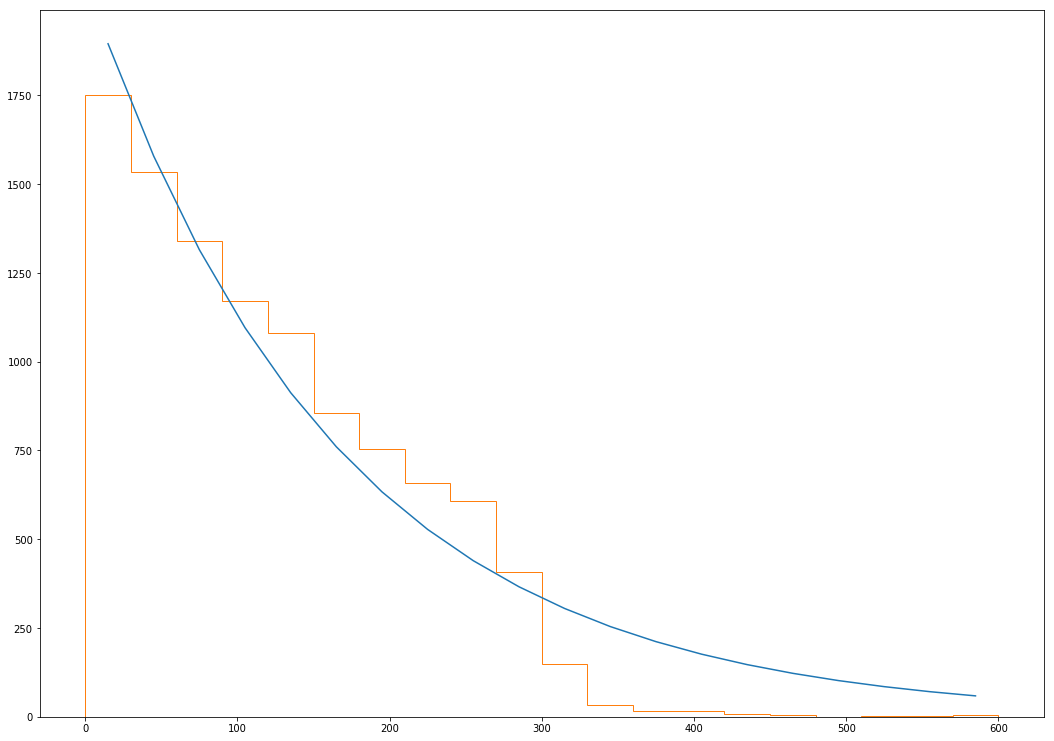

[2.07668955e+03 6.08867260e-03]
164.23941075179428
Derived kr83m halflife:  113.84208449943297


In [50]:
def expo(x, a, b):
    return a*np.exp(-b*x)
print(len(Delta_t))
fig, ax1 = plt.subplots(sharex=False, figsize=(18, 13))
bins = np.linspace(0, 600, 21)
# binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])
time_diff_hist, binEdges = np.histogram(Delta_t, bins=bins)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
popt, pcov = curve_fit(expo, xdata=bincenters, ydata=time_diff_hist, p0=[2000, 0.01])



ax1.hist(Delta_t, bins, histtype='step', color='C1')
plt.plot(bincenters, expo(bincenters, *popt))
plt.show()
print(popt)
print(1/popt[1])
print('Derived kr83m halflife: ',(1/popt[1])*np.log(2))

No handles with labels found to put in legend.


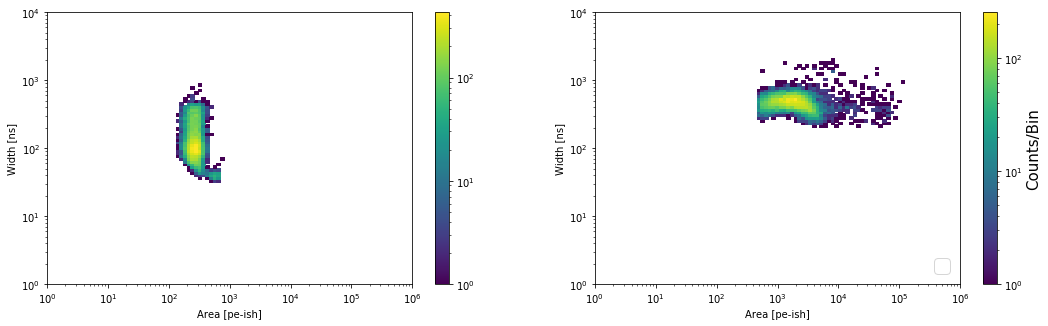

In [45]:
fig, (ax1,ax2)  = plt.subplots(1,2, figsize=(18, 5))

bins_x = np.logspace(0,6,100)
bins_y = np.logspace(0,4,100)
histo_max= 2*10**3

countsS1, _, _ = np.histogram2d(Kr_S1_area, Kr_S1_width, bins=(bins_x, bins_y))
countsS2, _, _ = np.histogram2d(Kr_S2_area, Kr_S2_width, bins=(bins_x, bins_y))


im1 = ax1.pcolormesh(bins_x, bins_y, countsS1.T, cmap='viridis', norm=mcolors.LogNorm())
im2 = ax2.pcolormesh(bins_x, bins_y, countsS2.T, cmap='viridis', norm=mcolors.LogNorm())
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Area [pe-ish]')
ax1.set_ylabel('Width [ns]')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlabel('Area [pe-ish]')
ax2.set_ylabel('Width [ns]')

cbar = plt.colorbar(im1, ax=ax1)
cbar = plt.colorbar(im2, ax=ax2)
cbar.set_label(label ='Counts/Bin', fontsize=15)
plt.legend(loc =4,prop={'size': 20})



In [46]:
def single_gaus(x, h, mu, sigma):

    gaus = h * np.exp(-(x-mu)**2         /(2*sigma**2))
    return gaus

n1, binEdges1 = np.histogram(PMT1_width, bins=np.linspace(200,1500,20))
n4, binEdges4 = np.histogram(PMT4_width, bins=np.linspace(200,1500,20))
n2, binEdges2 = np.histogram(PMT2_width, bins=np.linspace(200,1500,20))
n5, binEdges5 = np.histogram(PMT5_width, bins=np.linspace(200,1500,20))
n3, binEdges3 = np.histogram(PMT3_width, bins=np.linspace(200,1500,20))
n6, binEdges6 = np.histogram(PMT6_width, bins=np.linspace(200,1500,20))
n7, binEdges7 = np.histogram(PMT7_width, bins=np.linspace(200,1500,20))
bincenters1 = 0.5 * (binEdges1[1:] + binEdges1[:-1])
bincenters4 = 0.5 * (binEdges4[1:] + binEdges4[:-1])
bincenters2 = 0.5 * (binEdges2[1:] + binEdges2[:-1])
bincenters5 = 0.5 * (binEdges5[1:] + binEdges5[:-1])
bincenters3 = 0.5 * (binEdges3[1:] + binEdges3[:-1])
bincenters6 = 0.5 * (binEdges6[1:] + binEdges6[:-1])
bincenters7 = 0.5 * (binEdges7[1:] + binEdges7[:-1])
p0 =[10,700,200]
bounds = ((10, 300,50),(np.inf, 1500,np.inf ))

x_range = np.linspace(0,1500,100)

popt1, pcov1 = curve_fit(single_gaus, bincenters1, n1, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n1), np.ones_like(n1)))
popt4, pcov4 = curve_fit(single_gaus, bincenters4, n4, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n4), np.ones_like(n4)))
popt2, pcov2 = curve_fit(single_gaus, bincenters2, n2, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n2), np.ones_like(n2)))
popt5, pcov5 = curve_fit(single_gaus, bincenters5, n5, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n5), np.ones_like(n5)))
popt3, pcov3 = curve_fit(single_gaus, bincenters3, n3, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n3), np.ones_like(n3)))
popt6, pcov6 = curve_fit(single_gaus, bincenters6, n6, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n6), np.ones_like(n6)))
popt7, pcov7 = curve_fit(single_gaus, bincenters7, n7, p0, bounds =bounds,  sigma=np.maximum(np.sqrt(n7), np.ones_like(n7)))
perr1 = np.sqrt(np.diag(pcov1))
perr2 = np.sqrt(np.diag(pcov2))
perr3 = np.sqrt(np.diag(pcov3))
perr4 = np.sqrt(np.diag(pcov4))
perr5 = np.sqrt(np.diag(pcov5))
perr6 = np.sqrt(np.diag(pcov6))
perr7 = np.sqrt(np.diag(pcov7))

PlotFlag = False
ArrowFlag = True

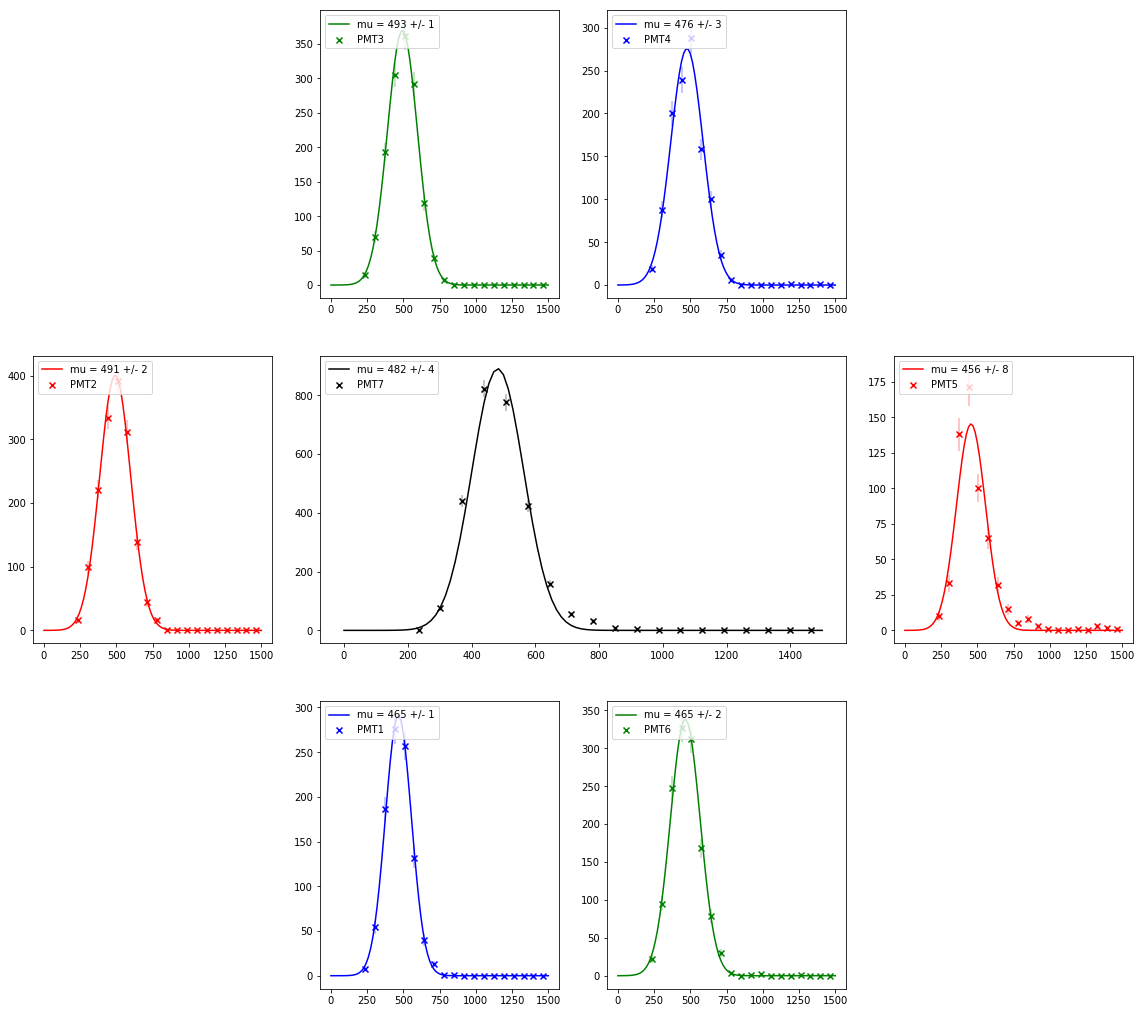

centroid14:  -0.011
centroid25:  0.037
centroid36:  0.03


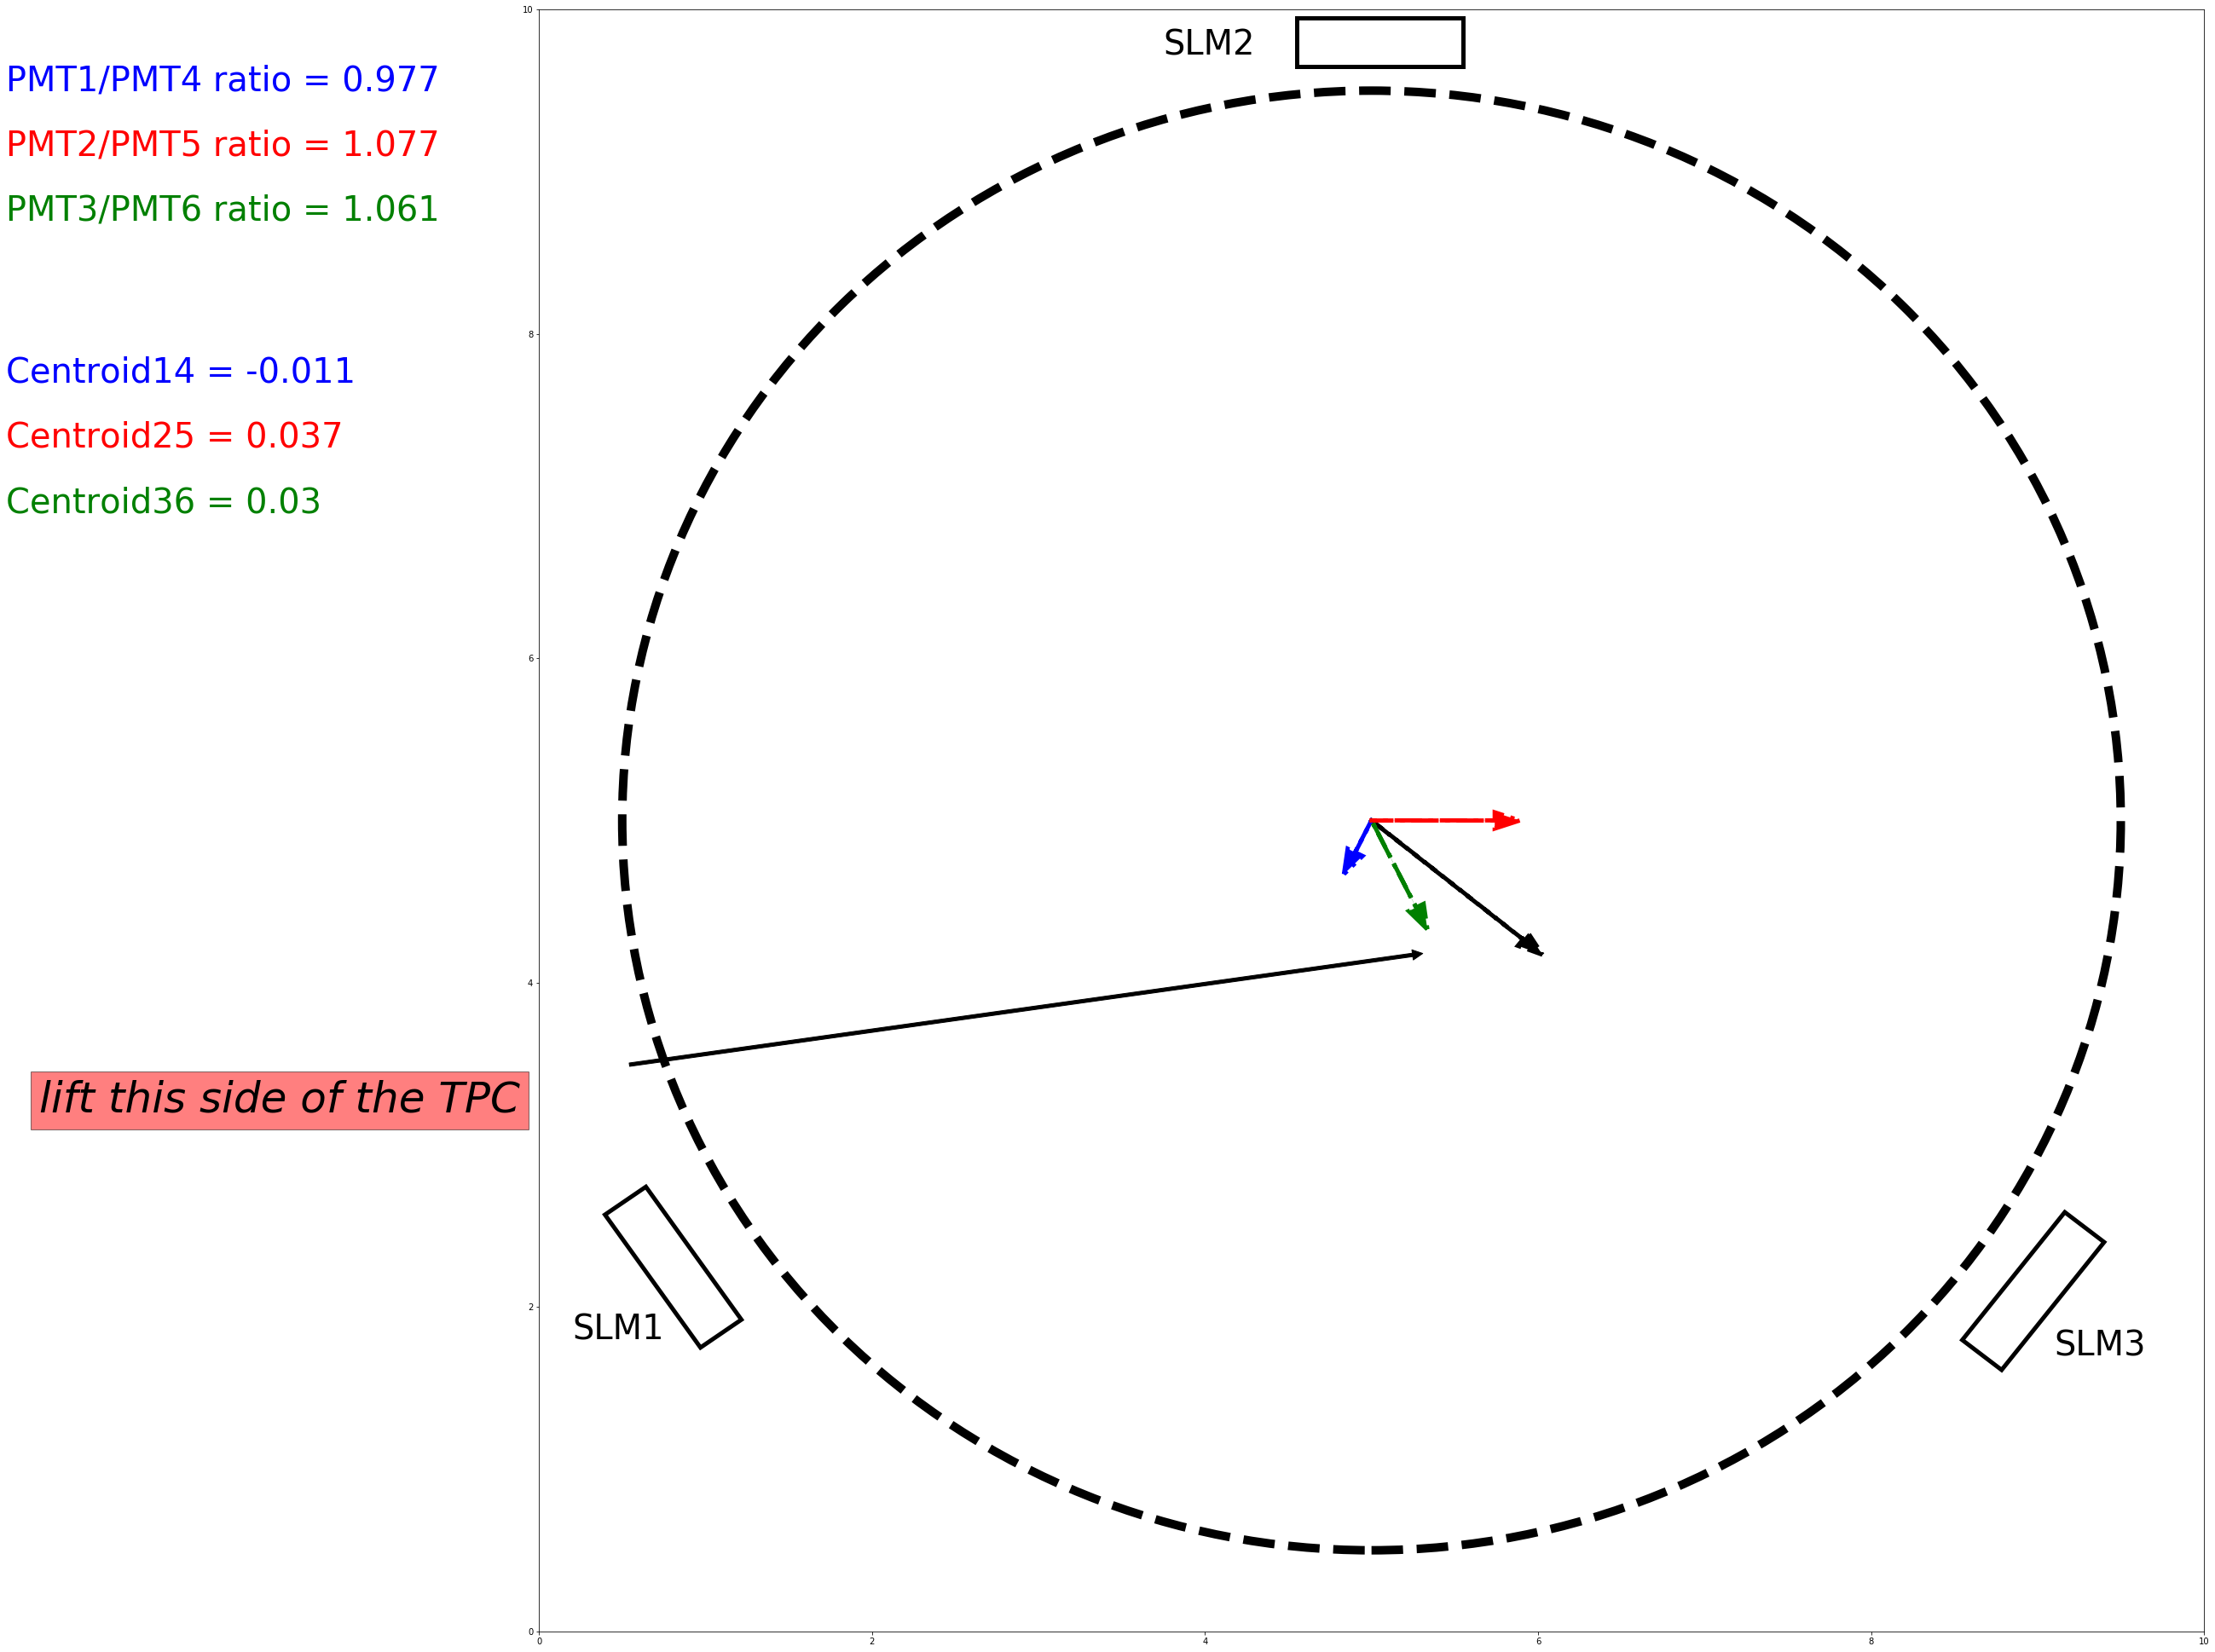

In [47]:

plt.figure(figsize=(30, 18))

G = gridspec.GridSpec(3, 6)

# axes_0 = plt.figure(G[0,1])

axes_1 = plt.subplot(G[2, 2])
axes_1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
axes_1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
axes_1.legend(prop={'size': 10}, loc = 'upper left')
axes_1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_2 =plt.subplot(G[1,1])
axes_2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
axes_2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
axes_2.legend(prop={'size': 10}, loc = 'upper left')
axes_2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_3 = plt.subplot(G[0, 2])
axes_3.scatter(bincenters3, n3, c = 'g', marker = 'x', label = 'PMT3')
axes_3.plot(x_range, single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
axes_3.legend(prop={'size': 10}, loc = 'upper left')
axes_3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_4= plt.subplot(G[0, 3])
axes_4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
axes_4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
axes_4.legend(prop={'size': 10}, loc = 'upper left')
axes_4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

axes_5 = plt.subplot(G[1,4])
axes_5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
axes_5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
axes_5.legend(prop={'size': 10}, loc = 'upper left')
axes_5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

axes_6 = plt.subplot(G[2,3])
axes_6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
axes_6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
axes_6.legend(prop={'size': 10}, loc = 'upper left')
axes_6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

axes_7 =plt.subplot(G[1, 2:4])
axes_7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7' )
axes_7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
axes_7.legend(prop={'size': 10}, loc = 'upper left')
axes_7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')

plt.show()





fig, ax0 = plt.subplots(figsize=(35, 35))

Ratio1_4 = popt1[1]/popt4[1]
Ratio2_5 = popt2[1]/popt5[1]
Ratio3_6 = popt3[1]/popt6[1]
Ratio1_4 = str("%0.3f" % Ratio1_4)
Ratio2_5 = str("%0.3f" % Ratio2_5)
Ratio3_6 = str("%0.3f" % Ratio3_6)


reflector  = plt.Circle((5, 5), 4.5, color='black',linestyle ='--', linewidth='10', fill = False)
left1, bottom1, width1, height1 = [0.29, 0.15, 0.2, 0.2]
left2, bottom2, width2, height2 = [0.17, 0.4, 0.2, 0.2]
left3, bottom3, width3, height3 = [0.29, 0.65, 0.2, 0.2]
left4, bottom4, width4, height4 = [0.54, 0.65, 0.2, 0.2]
left5, bottom5, width5, height5 = [0.65, 0.4, 0.2, 0.2]
left6, bottom6, width6, height6 = [0.54, 0.15, 0.2, 0.2]
left7, bottom7, width7, height7 = [0.41, 0.4, 0.2, 0.2]
ax0.set_xlim([0,10])
ax0.set_ylim([0,10])
ax0.add_artist(reflector)


SLM1 = Rectangle((0.97, 1.75), 0.3, 1, angle=35.0, fill = False, linewidth = '5')
SLM2 = Rectangle((4.55, 9.65), 1, 0.3, angle=0, fill = False, linewidth = '5')
SLM3 = Rectangle((9.4, 2.4), 0.3, 1, angle=142.0, fill = False, linewidth = '5')
ax0.add_patch(SLM1)
ax0.add_patch(SLM2)
ax0.add_patch(SLM3)


Ratio1_4 = float(Ratio1_4)
Ratio2_5 = float(Ratio2_5)
Ratio3_6 = float(Ratio3_6)




scaling_factor =20
centroid25 = (popt2[1] - popt5[1])/(popt2[1] + popt5[1])
centroid14 = (popt1[1] - popt4[1])/(popt1[1] + popt4[1])
centroid36 = (popt3[1] - popt6[1])/(popt3[1] + popt6[1])
centroid25 = str("%0.3f" % centroid25)
centroid14 = str("%0.3f" % centroid14)
centroid36 = str("%0.3f" % centroid36)
centroid25 = float(centroid25)
centroid14 = float(centroid14)
centroid36 = float(centroid36)


vector14 = np.array([14,28])
absolute_unit14 = math.sqrt((vector14 * vector14).sum())
unit14 = vector14* 1/absolute_unit14

vector25 = np.array([28,0])
absolute_unit25 = math.sqrt((vector25 * vector25).sum())
unit25 = vector25* 1/absolute_unit25

vector36 = np.array([14,-28])
absolute_unit36 = math.sqrt((vector36 * vector36).sum())
unit36 = vector36* 1/absolute_unit36


total_centroid = (centroid25*unit25 + centroid14*unit14 + centroid36*unit36)*scaling_factor

# print('total centroid :', total_centroid)
print('centroid14: ', centroid14)
print('centroid25: ', centroid25)
print('centroid36: ', centroid36)





# ax0.scatter([0.5], [3.2], s=800, c='r', marker='o', alpha=1)
# ax0.scatter([8.1], [1.2], s=800, c='r', marker='o', alpha=1)
# ax0.scatter([6], [9.8], s=800, c='r', marker='o', alpha=1)


ax0.text(-3.2, 9.5, 'PMT1/PMT4 ratio = '+str(Ratio1_4), fontsize=40, color = 'blue')
ax0.text(-3.2, 9.1, 'PMT2/PMT5 ratio = '+str(Ratio2_5), fontsize=40, color = 'red')
ax0.text(-3.2, 8.7, 'PMT3/PMT6 ratio = '+str(Ratio3_6), fontsize=40, color = 'green')


ax0.text(-3.2, 7.7, 'Centroid14 = '+str(centroid14), fontsize=40, color = 'blue')
ax0.text(-3.2, 7.3, 'Centroid25 = '+str(centroid25), fontsize=40, color = 'red')
ax0.text(-3.2, 6.9, 'Centroid36 = '+str(centroid36), fontsize=40, color = 'green')


ax0.text(0.2, 1.8, 'SLM1', fontsize=40, color = 'black')
ax0.text(3.75, 9.72, 'SLM2', fontsize=40, color = 'black')
ax0.text(9.1, 1.7, 'SLM3', fontsize=40, color = 'black')

if PlotFlag == True:

    ax1 = fig.add_axes([left1, bottom1, width1, height1])
    ax1.scatter(bincenters1, n1, c ='b', marker = 'x', label = 'PMT1')
    ax1.plot(x_range,single_gaus(x_range,*popt1), color = 'blue', label ='mu = '+str(int(popt1[1]))+' +/- '+str(int(perr1[1])))
    ax1.legend(prop={'size': 10}, loc = 'upper left')
    ax1.errorbar(bincenters1, n1, yerr=np.sqrt(n1), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

    ax2 = fig.add_axes([left2, bottom2, width2, height2])
    ax2.scatter(bincenters2, n2, c='r', marker = 'x', label = 'PMT2')
    ax2.plot(x_range, single_gaus(x_range, *popt2), color = 'red', label ='mu = '+str(int(popt2[1]))+' +/- '+str(int(perr2[1])))
    ax2.legend(prop={'size': 10}, loc = 'upper left')
    ax2.errorbar(bincenters2, n2, yerr=np.sqrt(n2), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

    ax3 = fig.add_axes([left3, bottom3, width3, height3])
    ax3.scatter(bincenters3, n3, c ='g', marker = 'x', label = 'PMT3')
    ax3.plot(x_range,single_gaus(x_range,*popt3), color = 'green', label ='mu = '+str(int(popt3[1]))+' +/- '+str(int(perr3[1])))
    ax3.legend(prop={'size': 10}, loc = 'upper left')
    ax3.errorbar(bincenters3, n3, yerr=np.sqrt(n3), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

    ax4 = fig.add_axes([left4, bottom4, width4, height4])
    ax4.scatter(bincenters4, n4, c ='b', marker = 'x', label = 'PMT4')
    ax4.plot(x_range,single_gaus(x_range,*popt4), color = 'blue', label ='mu = '+str(int(popt4[1]))+' +/- '+str(int(perr4[1])))
    ax4.legend(prop={'size': 10}, loc = 'upper left')
    ax4.errorbar(bincenters4, n4, yerr=np.sqrt(n4), ecolor='blue', marker= '.', mec='blue', mfc= 'blue', alpha = 0.3, linestyle='None')

    ax5 = fig.add_axes([left5, bottom5, width5, height5])
    ax5.scatter(bincenters5, n5, c='r', marker = 'x', label = 'PMT5')
    ax5.plot(x_range, single_gaus(x_range, *popt5), color = 'red', label ='mu = '+str(int(popt5[1]))+' +/- '+str(int(perr5[1])))
    ax5.legend(prop={'size': 10}, loc = 'upper left')
    ax5.errorbar(bincenters5, n5, yerr=np.sqrt(n5), ecolor='red', marker= '.', mec='red', mfc= 'red', alpha = 0.3, linestyle='None')

    ax6 = fig.add_axes([left6, bottom6, width6, height6])
    ax6.scatter(bincenters6, n6, c = 'g', marker = 'x', label = 'PMT6' )
    ax6.plot(x_range, single_gaus(x_range, *popt6), color = 'green', label ='mu = '+str(int(popt6[1]))+' +/- '+str(int(perr6[1])))
    ax6.legend(prop={'size': 10}, loc = 'upper left')
    ax6.errorbar(bincenters6, n6, yerr=np.sqrt(n6), ecolor='green', marker= '.', mec='green', mfc= 'green', alpha = 0.3, linestyle='None')

    ax7 = fig.add_axes([left7, bottom7, width7, height7])
    ax7.scatter(bincenters7, n7, c = 'black', marker = 'x', label = 'PMT7')
    ax7.plot(x_range, single_gaus(x_range, *popt7), color = 'black', label ='mu = '+str(int(popt7[1]))+' +/- '+str(int(perr7[1])))
    ax7.legend(prop={'size': 10}, loc = 'upper left')
    ax7.errorbar(bincenters7, n7, yerr=np.sqrt(n7), ecolor='black', marker= '.', mec='black', mfc= 'black', alpha = 0.3, linestyle='None')
    
    plt.show()

if ArrowFlag == True:
    ax0.arrow(5,5, total_centroid[0], total_centroid[1], linewidth= 5, linestyle = '--', head_width=0.1, fc='k', ec='k')
    ax0.arrow(5,5 ,centroid14*unit14[0]*scaling_factor ,centroid14*unit14[1]*scaling_factor, color='blue', linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.arrow(5,5 ,centroid25*unit25[0]*scaling_factor ,centroid25*unit25[1]*scaling_factor, color='red',  linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.arrow(5,5 ,centroid36*unit36[0]*scaling_factor ,centroid36*unit36[1]*scaling_factor, color='green',linewidth= 5, linestyle = '-.', head_width=0.1)
    ax0.annotate('lift this side of the TPC', xy=(total_centroid[0]+5,total_centroid[1]+5), xytext=(-3,3.2),
                arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
            bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')



# if Ratio1_4 < 1 and Ratio2_5 < 1:
#     ax0.annotate('to low/high here! \nelevate/lower this screw (SLM1)', xy=(0.5, 3.2), xytext=(-3.7, 4),
#             arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')
# if Ratio2_5 < 1 and Ratio3_6 < 1:
#     ax0.annotate('to low/high here! \nelevate/lower this screw (SLM3)', xy=(8.1, 1.2), xytext=(9.2,0.5),
#             arrowprops=dict(facecolor='black', shrink=0.1), style='italic',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')
# if Ratio3_6 < 1 and Ratio1_4 < 1:
#     ax0.annotate('to low/high here! \nelevate/lower this screw (SLM2)', xy=(6, 9.8), xytext=(8.5, 9.4),
#             arrowprops=dict(facecolor='black', shrink=0.1),style='italic',
#         bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}, fontsize = 50, color = 'black')

# if Ratio3_6 > 1 and Ratio1_4 >:  

# if Ratio2_5 > 1 and Ratio1_4 >: 
    
# if Ratio2_5 > 1 and Ratio3_6 >: 
    
# if Ratio2_5 > 1 and Ratio3_6 > and Ratio1_4 > 1: 
    
# if Ratio2_5 < 1 and Ratio3_6 < and Ratio1_4 < 1: 
   

    plt.show()


# print('PMT1 width: ', popt1[1], '      number of entries: ', len(PMT1_width))
# print('PMT4 width: ', popt4[1], '      number of entries: ', len(PMT4_width))
# print('PMT2 width: ', popt2[1], '       number of entries: ', len(PMT2_width))
# print('PMT5 width: ', popt5[1], '      number of entries: ', len(PMT5_width))
# print('PMT3 width: ', popt3[1], '      number of entries: ', len(PMT3_width))
# print('PMT6 width: ', popt6[1], '      number of entries: ', len(PMT6_width))
# print('PMT1/PMT4 ratio should be close to 1: ', Ratio1_4)
# print('PMT2/PMT5 ratio should be close to 1: ', Ratio2_5)
# print('PMT3/PMT6 ratio should be close to 1: ', Ratio3_6)

